# kNN

### text + voted_up:

In [2]:
import pandas as pd
import numpy as np
import jsonlines
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier

In [4]:
X = []; y = []; z = []
df = pd.read_json('reviews.jl', lines = True)

#remove non-ascii characters
#https://qxf2.com/blog/cleaning-data-python-pandas/
df.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
print(df.head())

X = df['text'].values
print("text:\n", X)

y = df['voted_up'].values
print("text:\n", y)

z = df['early_access'].values
print("text:\n", z)

                                                text   appid  \
0                                 Needs more content  218230   
1  With the Zombie FPS market still expanding, co...  238430   
2                                                     236390   
3  pretty good, but very difficult at first. requ...   35450   
4           best game ever i love it thank you valve     730   

                      steamid  voted_up  votes_up  votes_funny  early_access  \
0  profiles/76561197961325178      True         1            0         False   
1  profiles/76561197980241606      True         0            0         False   
2  profiles/76561198095107714      True         1            0         False   
3  profiles/76561198248947756      True         2            0         False   
4  profiles/76561197961942638      True         1            0         False   

   tstamp_created  
0      1542801600  
1      1386072000  
2      1480161600  
3      1572436800  
4      1461412800  
text:
 ['Needs

In [6]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf = True, max_df = 0.95)
tfidf_vectorizer.fit_transform(X)

train_set = tfidf_vectorizer.transform(X)
test_set = tfidf_vectorizer.transform(X)

# GET FEATURES
X_train = train_set
X_test = test_set 

Y_train = y
Y_test= y

Z_train = z
Z_test = z

#### Cross-Validation

K 1

K 3

K 5

K 7

K 10



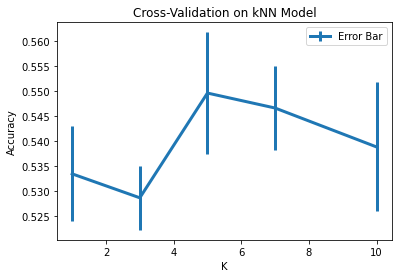

In [51]:
import matplotlib.pyplot as plt

mean_error=[]; std_error=[]
k_range = [1,3,5,7,10]
for Ki in k_range:
    print("K %d\n"%Ki)
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors = Ki, weights = 'uniform')
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())

plt.errorbar(k_range,mean_error,yerr=std_error,linewidth=3)
plt.xlabel('K'); plt.ylabel('Accuracy')
plt.title('Cross-Validation on kNN Model')
plt.legend(['Error Bar'])
plt.show()

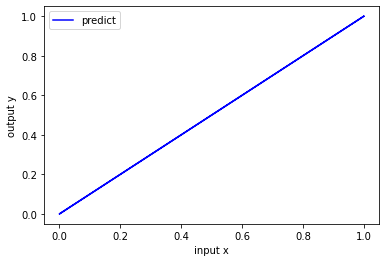

In [55]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
model = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').fit(X_train, Y_train)
xpred = model.predict(X_train)
ypred = model.predict(X_test)
#plt.scatter(X_train, Y_train, color = 'red', marker = '+')
plt.plot(xpred, ypred, color = 'blue')
plt.xlabel("input x"); plt.ylabel("output y"); plt.legend(["predict", "train"])
plt.show()

[False  True]
AUC Score: 0.75105672


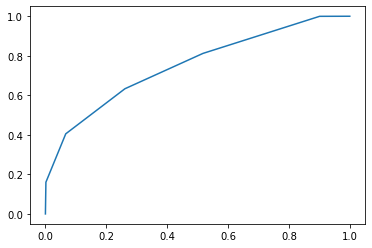

In [56]:
from sklearn.metrics import roc_curve
preds = model.predict_proba(X_test)
print(model.classes_)
fpr, tpr, _ = roc_curve(Y_test, preds[:,1])
plt.plot(fpr, tpr)

from sklearn import metrics
auc_score = metrics.roc_auc_score(Y_test, preds[:,1])
print("AUC Score:", auc_score)

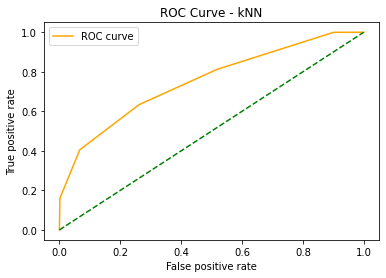

In [23]:

fpr, tpr, _ = roc_curve(Y_test, preds[:,1])
plt.plot(fpr, tpr, color='orange')
plt.legend(['ROC curve','Logistic Regression'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('ROC Curve - kNN')
plt.show()

In [24]:
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, ypred)
print("Confusion Matrix:")
print(cm)

metrics.accuracy_score(Y_test, ypred)


Confusion Matrix:
[[1847  653]
 [ 917 1583]]


Text(0.5, 1.0, 'Accuracy = 0.69')

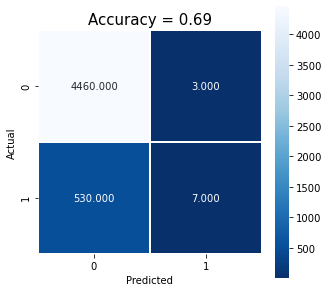

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="0.3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Accuracy = 0.69', size = 15)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, ypred))

              precision    recall  f1-score   support

       False       0.67      0.74      0.70      2500
        True       0.71      0.63      0.67      2500

    accuracy                           0.69      5000
   macro avg       0.69      0.69      0.69      5000
weighted avg       0.69      0.69      0.69      5000



## Baseline

[[2500    0]
 [2500    0]]
              precision    recall  f1-score   support

       False       0.50      1.00      0.67      2500
        True       0.00      0.00      0.00      2500

    accuracy                           0.50      5000
   macro avg       0.25      0.50      0.33      5000
weighted avg       0.25      0.50      0.33      5000



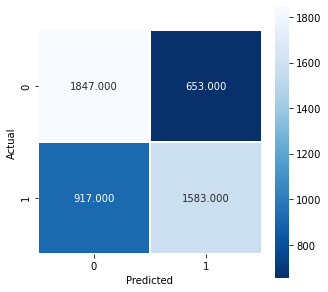

In [29]:
from sklearn import metrics
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = "most_frequent").fit(X_train, Y_train)
ydummy = dummy.predict(X_test)
dummycm = metrics.confusion_matrix(Y_test, ydummy)
print(dummycm)

print(classification_report(Y_test, ydummy))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="0.3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Text + early_access:

#### Cross-Validation

K 1

K 3

K 5

K 7

K 10



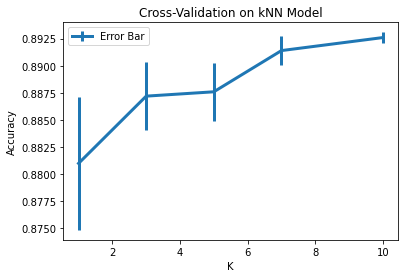

In [58]:
import matplotlib.pyplot as plt

mean_error=[]; std_error=[]
k_range = [1,3,5,7,10]
for Ki in k_range:
    print("K %d\n"%Ki)
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors = Ki, weights = 'uniform')
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(model, X_train, Z_train, cv=5, scoring='accuracy')
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())

plt.errorbar(k_range,mean_error,yerr=std_error,linewidth=3)
plt.xlabel('K'); plt.ylabel('Accuracy')
plt.title('Cross-Validation on kNN Model')
plt.legend(['Error Bar'])
plt.show()

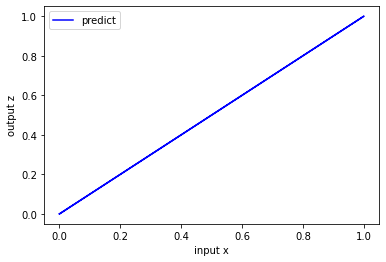

In [60]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
model = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform').fit(X_train, Z_train)
xpred = model.predict(X_train)
zpred = model.predict(X_test)
#plt.scatter(X_train, Y_train, color = 'red', marker = '+')
plt.plot(xpred, zpred, color = 'blue')
plt.xlabel("input x"); plt.ylabel("output z"); plt.legend(["predict", "train"])
plt.show()

### ROC Curve

[False  True]
AUC Score: 0.7963837570322674


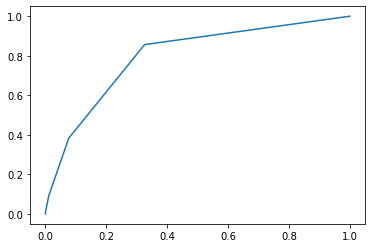

In [61]:
from sklearn.metrics import roc_curve
zpreds = model.predict_proba(X_test)
print(model.classes_)
fpr, tpr, _ = roc_curve(Z_test, zpreds[:,1])
plt.plot(fpr, tpr)

from sklearn import metrics
auc_score = metrics.roc_auc_score(Z_test, zpreds[:,1])
print("AUC Score:", auc_score)

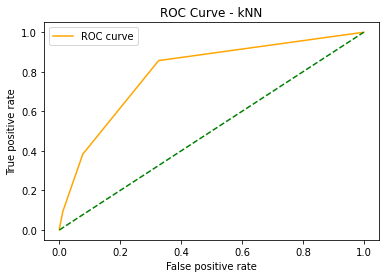

In [62]:

fpr, tpr, _ = roc_curve(Z_test, zpreds[:,1])
plt.plot(fpr, tpr, color='orange')
plt.legend(['ROC curve','kNN'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('ROC Curve - kNN')
plt.show()

### Confusion Matrix

In [63]:
from sklearn import metrics
cm = metrics.confusion_matrix(Z_test, zpred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[4460    3]
 [ 530    7]]


Text(0.5, 1.0, 'Accuracy: 0.89')

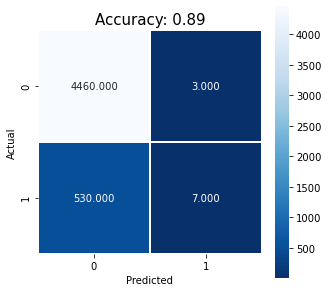

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="0.3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Accuracy: 0.89', size = 15)

### Classification Report

In [66]:
from sklearn.metrics import classification_report
print(classification_report(Z_test, zpred))

              precision    recall  f1-score   support

       False       0.89      1.00      0.94      4463
        True       0.70      0.01      0.03       537

    accuracy                           0.89      5000
   macro avg       0.80      0.51      0.48      5000
weighted avg       0.87      0.89      0.85      5000



## Baseline

Confusion Matrix:
 [[4463    0]
 [ 537    0]]

Classfication Report:
               precision    recall  f1-score   support

       False       0.89      1.00      0.94      4463
        True       0.00      0.00      0.00       537

    accuracy                           0.89      5000
   macro avg       0.45      0.50      0.47      5000
weighted avg       0.80      0.89      0.84      5000



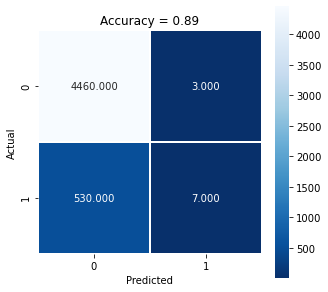

In [48]:
from sklearn import metrics
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = "most_frequent").fit(X_train, Z_train)
zdummy = dummy.predict(X_test)
dummycm = metrics.confusion_matrix(Z_test, zdummy)
print("Confusion Matrix:\n", dummycm)

print("\nClassfication Report:\n", classification_report(Z_test, zdummy))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="0.3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Accuracy = 0.89')
plt.show()